# <center>Project Assignment - Supervised Learning </center>
   ### by Mohan Raju
   
<u><b>Data Description:</b></u><br>
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

<u><b>Domain:</b></u><br>
    Banking 

<u><b>Context:</b></u><br>
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

<u><b>Attribute Information:</b></u>

*  **ID:** Customer ID 
* **Age:** Customer's age in completed years 
* **Experience  :** #years of professional experience   
* **Income   :**  Annual income of the customer (\\$000) 
* **ZIP Code  :** Home Address ZIP code. 
* **Family   :** Family size of the customer  
* **CCAvg  :** Avg. spending on credit cards per month (\\$000)
* **Education  :** Education Level. 1: Undergrad; 2: Graduate;    3: Advanced/Professional  
* **Mortgage  :** Value of house mortgage if any. (\\$000) 
* **Personal Loan  :** Did this customer accept the personal loan offered in the last campaign? 
* **Securities Account :** Does the customer have a securities account with the bank? 
* **CD Account  :** Does the customer have a certificate of deposit (CD)    account with the bank?  
* **Online   :** Does the customer use internet banking facilities?  
* **Credit card  :** Does the customer use a credit card issued by  UniversalBank? 


<u><b>Learning Outcomes:</b></u>
* Exploratory Data Analysis
* Preparing the data to train a model 
* Training and making predictions using a classification model
* Model evaluation


<u><b>Objective:</b></u><br>
    The classification goal is to predict the likelihood of a liability customer buying personal loans. 

<u><b>Steps and tasks:</b></u>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [32]:
dataframe = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
dataframe.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Load the data into a data-frame. The data-frame should have data and column description.

In [38]:
dataframe.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage",
                     "PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]
dataframe.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [39]:
dataframe.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [40]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                   5000 non-null int64
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [34]:
dataframe.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


## Exploratory Data Analysis 

In [41]:
dataframe.shape

(5000, 14)

Observation: <br>Input data file contains 5000 records with 14 columns

In [43]:
# Studying the data
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


As per transpose matrix, the following information observered 
1. Experience:  This shows minimum experience values is -3. Experience can not be negative value. We need to treat this values.
2. Age: Mean value of Age is 45 approximately
3. ZIP Code and ID does not have any meaning here.
4. There is no much infromation for following attributes because of binary variable.
	   Personal Loan, Securities Account, CD Account, Online and CreditCard   
5. Family min. size is 1 and max is 4.


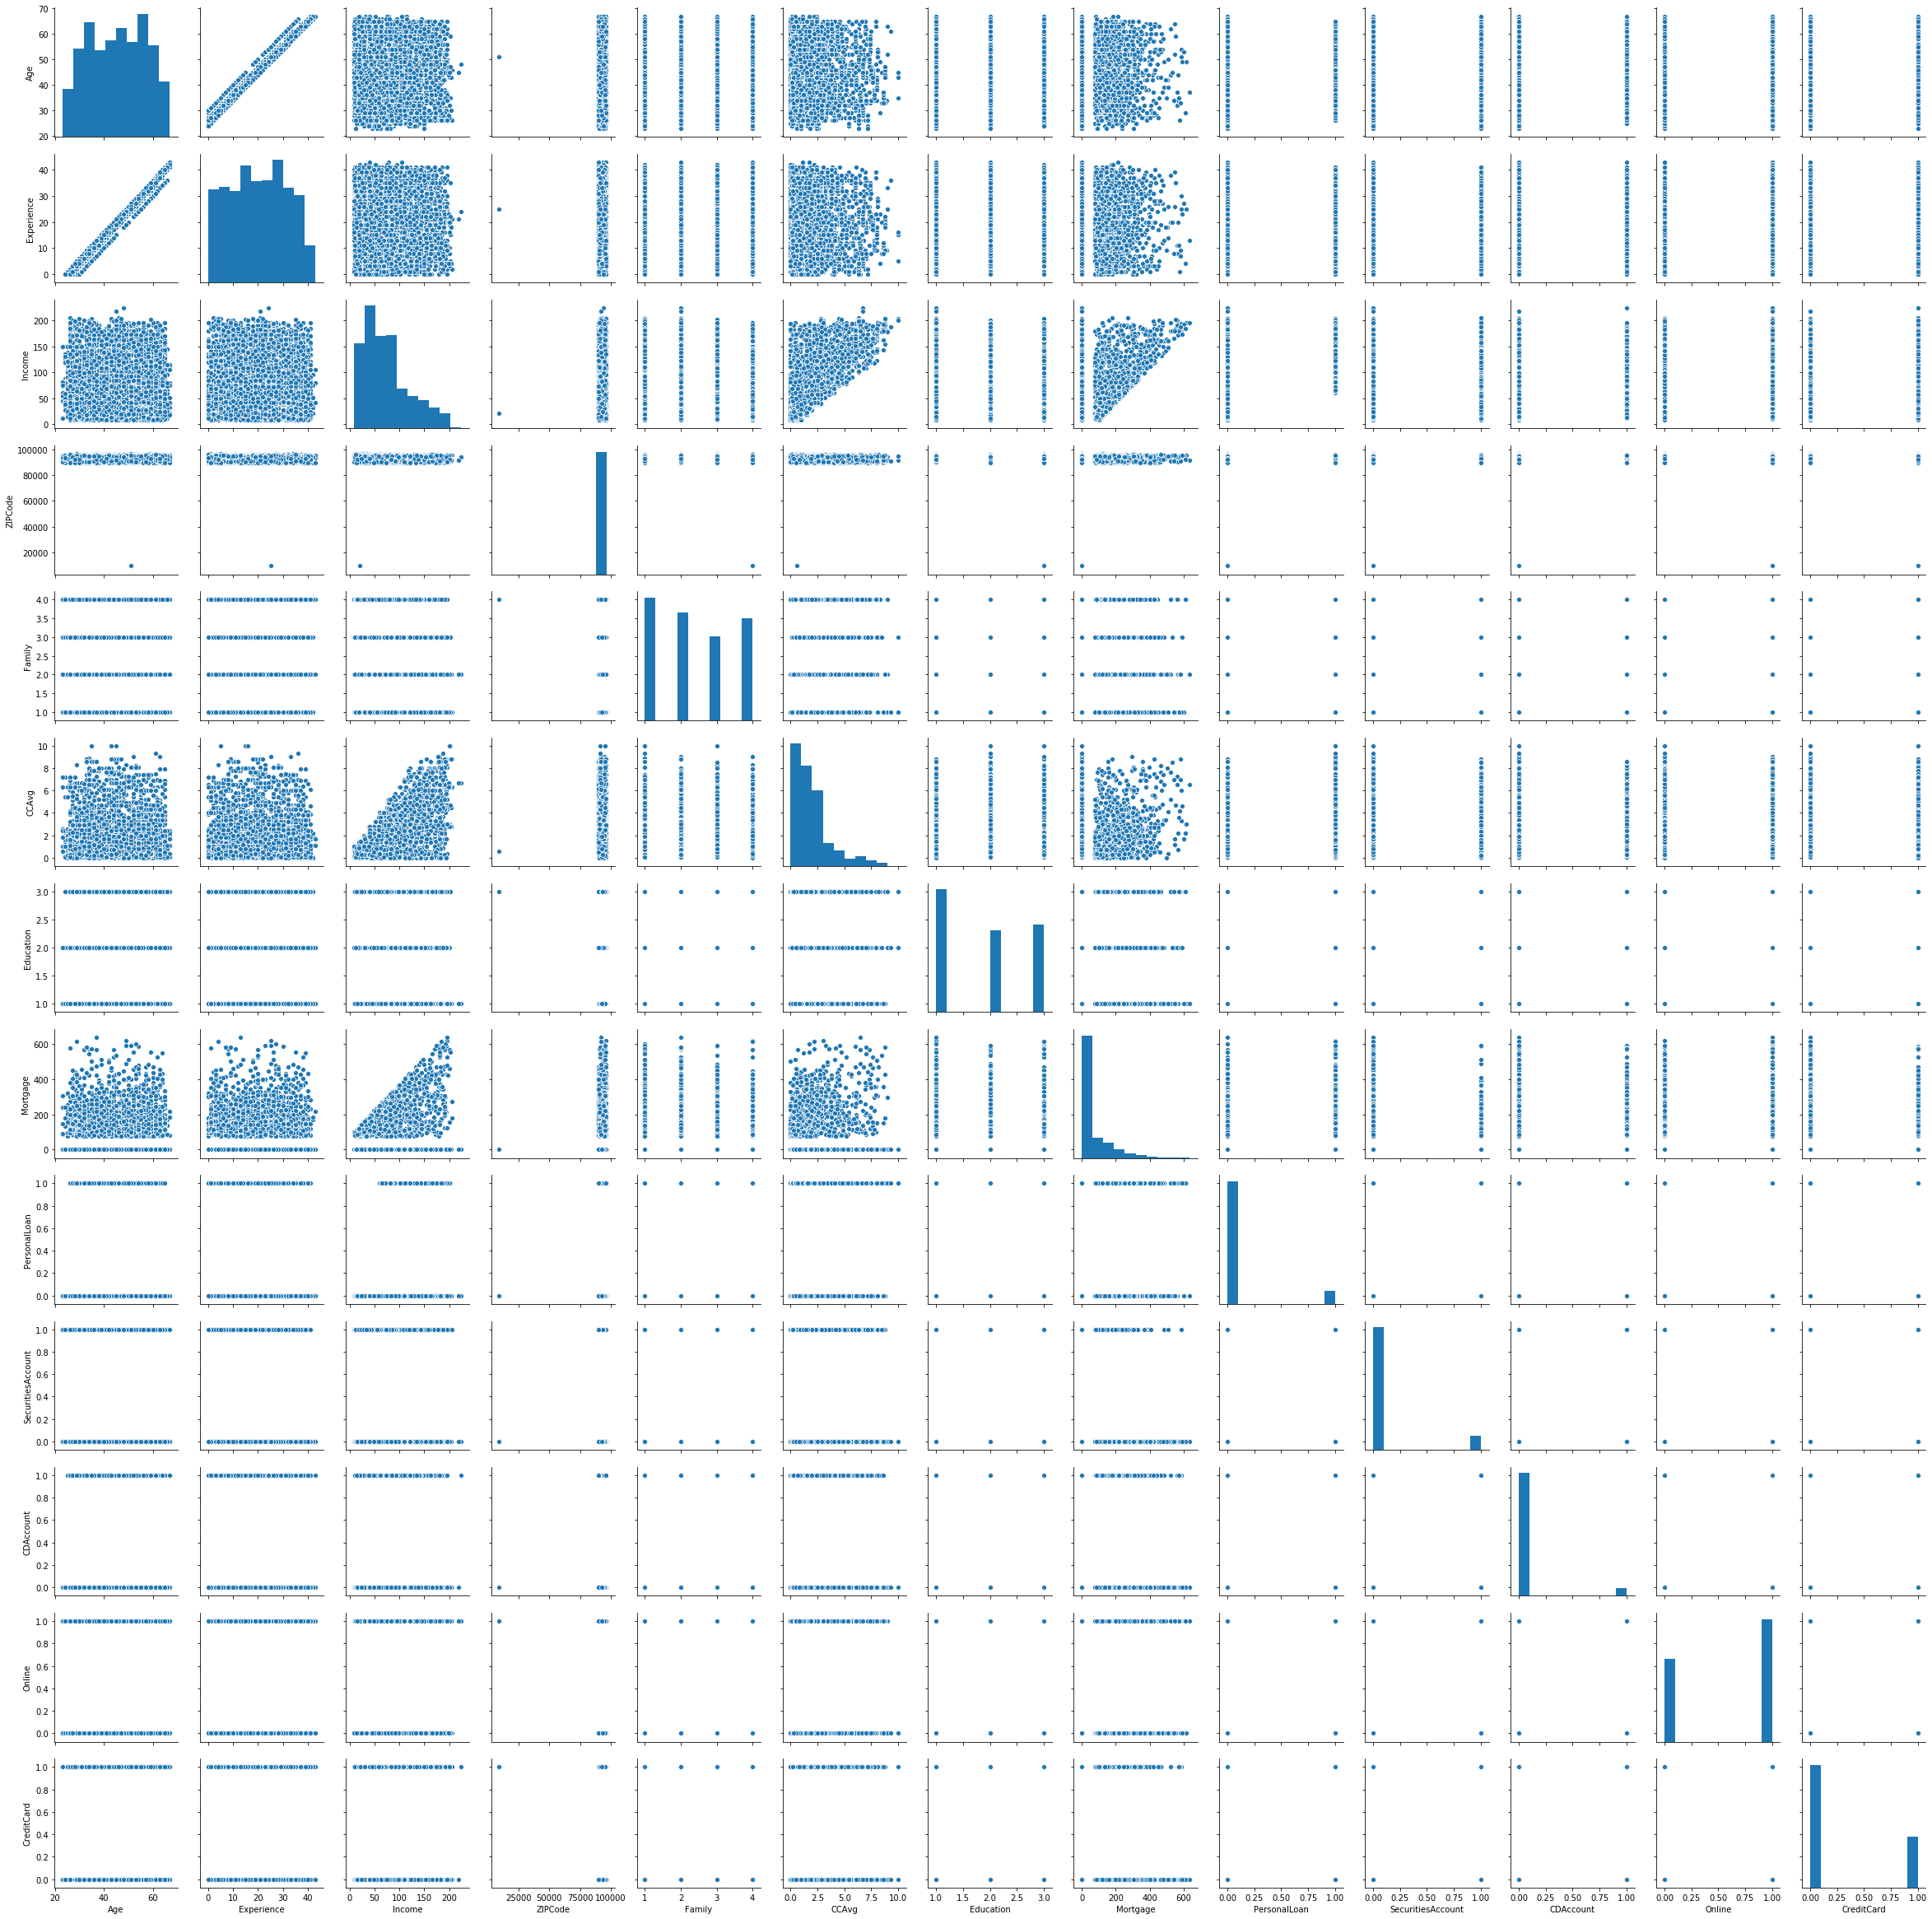

In [109]:
sns.pairplot(dataframe.iloc[:,1:])


## Univariate analysis

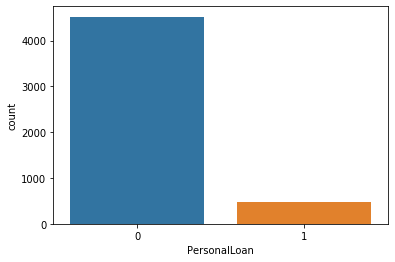

In [46]:
sns.countplot(x="PersonalLoan",  data=dataframe)


Observation:<br> As per problem description among given 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign. This plot shows that in visualization 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA95594BC8>,
      dtype=object)

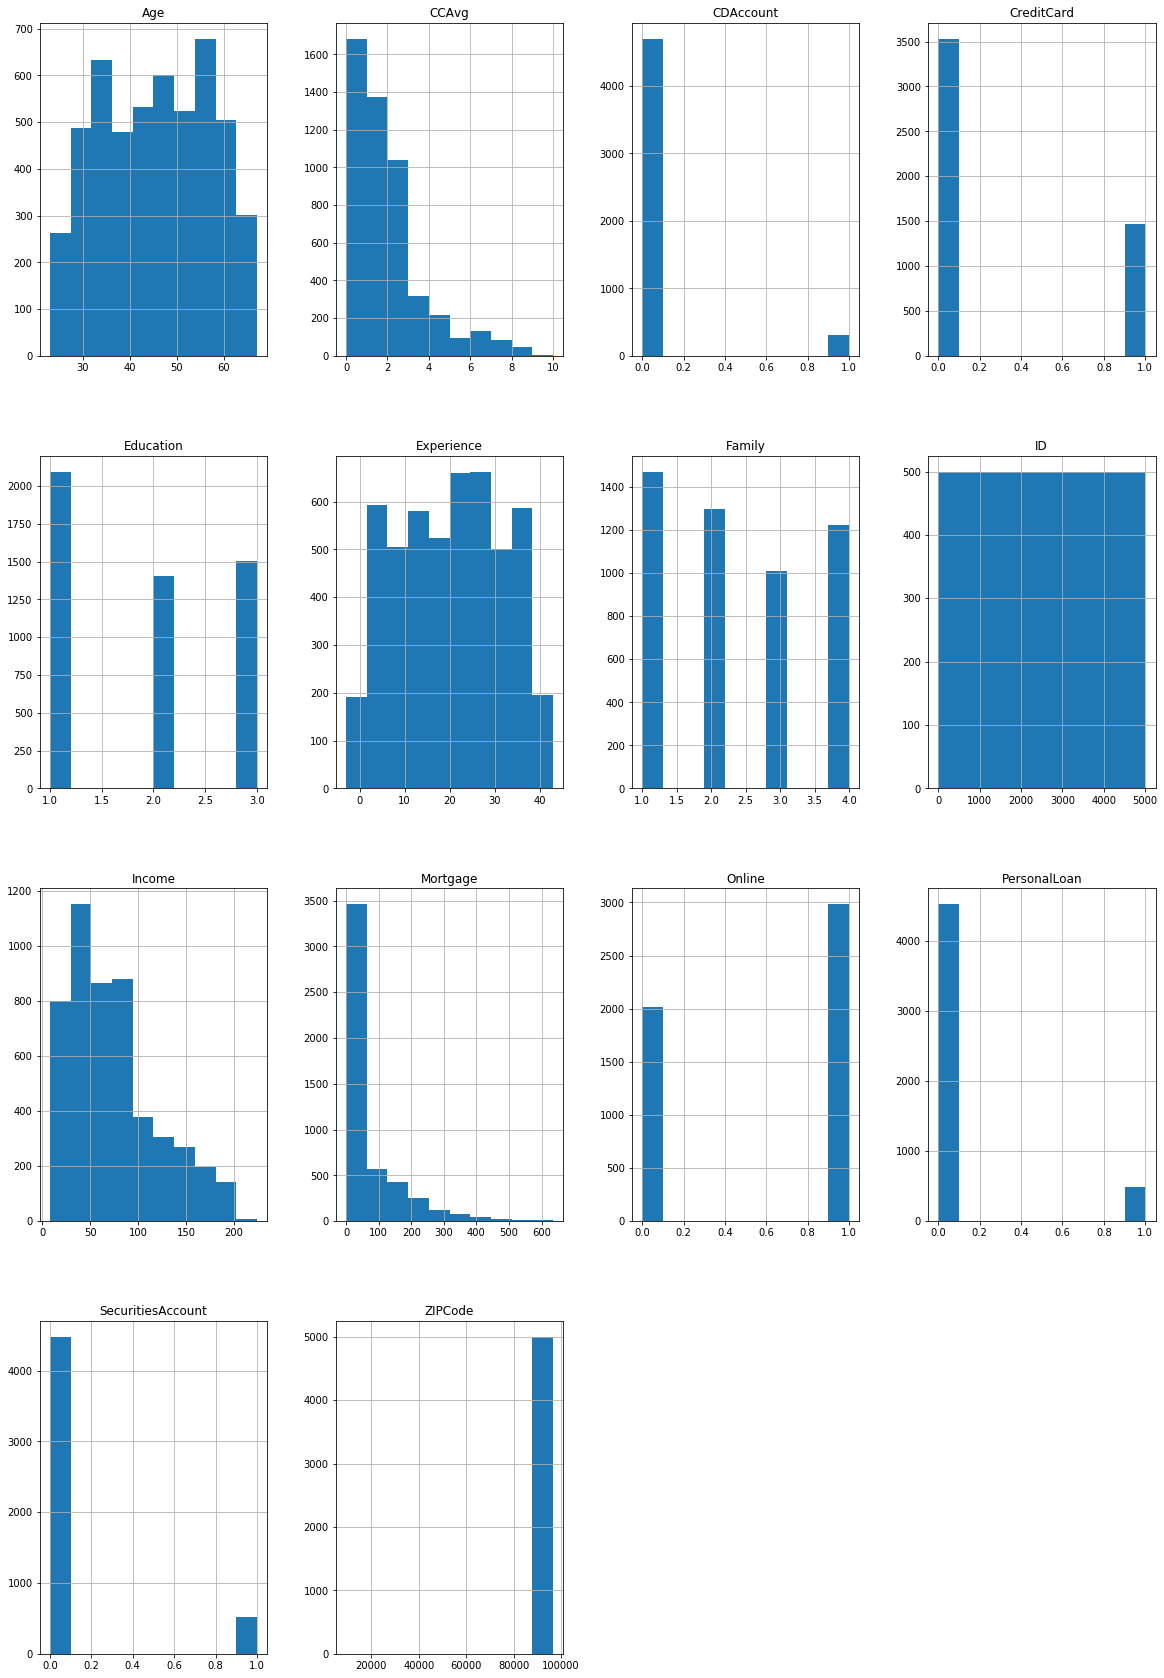

In [47]:
dataframe.hist(figsize=(20,30))

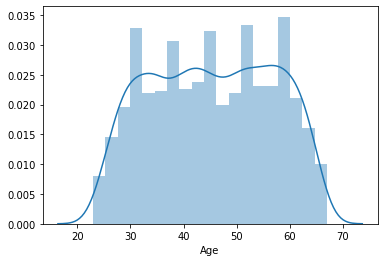

In [48]:
sns.distplot(dataframe['Age'])

Observation: <br> Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. <br> We can confirm this by looking at transpose matrix value, which shows mean(45.338400) is almost equal to median (45.0).

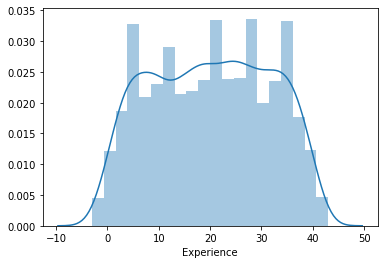

In [49]:
sns.distplot(dataframe['Experience']) 

Observation:<br>
Experience is normally distributed with more most of the customer having experience between 8 years to 40 years. <bR>Here the mean is equal to median. There are negative values in the Experience. <br> This could be a data input error as in general it is not possible to measure negative years of experience.

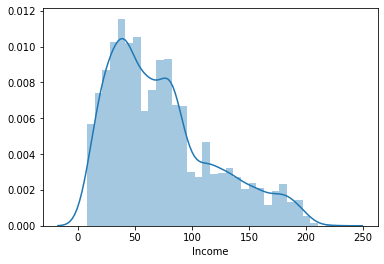

In [50]:
sns.distplot(dataframe['Income']) 

Observation: <br>
Income is positively skewed. Majority of the customers have income between 45K and 55K. <br>We can confirm this by saying the mean is greater than the median

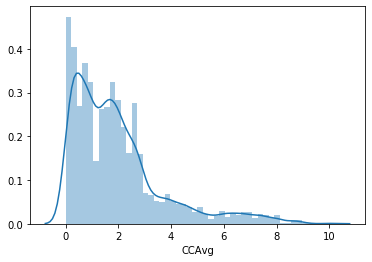

In [51]:
 sns.distplot(dataframe['CCAvg']) 

Observation:<br>
CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K

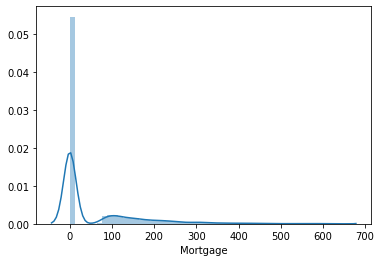

In [52]:
 sns.distplot(dataframe['Mortgage']) 

Observation: <br>
Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K

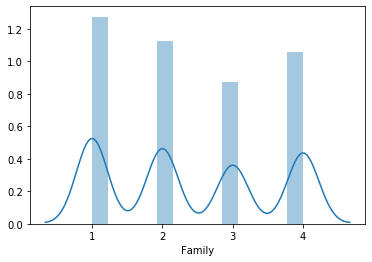

In [53]:
sns.distplot(dataframe['Family']) 

Observation:<br>
The variables family is a ordinal variable and it is evenly disributes.

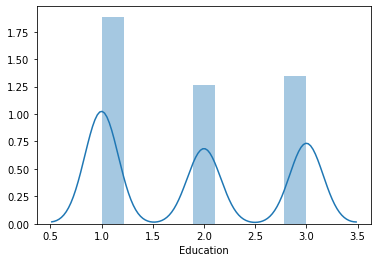

In [54]:
sns.distplot(dataframe['Education']) 

Observation:<br>
The variables education is a ordinal variable and it is evenly disributes.

### Multivariate analysis

Target Column Distribution - In our case 'Personal Loan' is Target Variable

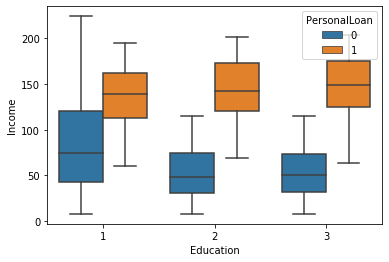

In [55]:
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=dataframe)

Observation : <br> 
Income is more who falls under education level 1. And customers who as taken the personal loan also from same income level.

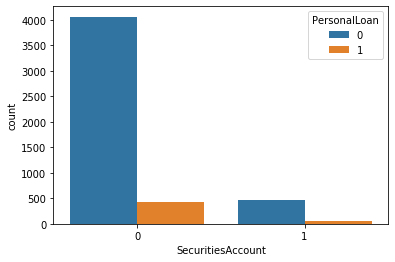

In [58]:
sns.countplot(x="SecuritiesAccount", data=dataframe, hue="PersonalLoan")

Observation : <br>Majority of customers who does not have loan have securities account

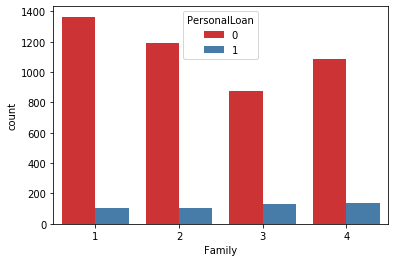

In [59]:
sns.countplot(x='Family', data=dataframe,hue='PersonalLoan', palette='Set1')

Observation: <br>
    it seems families with size of 3 are more likely to take loan. <br>
    Points to be considered for future campaign this might be good association.<br>
    Family size does not have any impact in personal loan. 
        

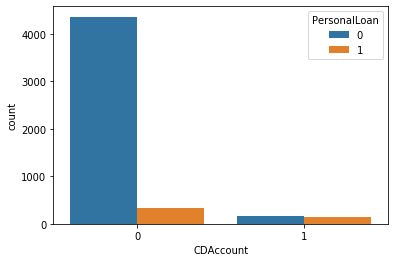

In [61]:
sns.countplot(x='CDAccount',data=dataframe,hue='PersonalLoan')

Observation: <br>
    Customers who does not have CD account , does not have loan as well. <br>
    This is majority. But almost all customers who has CD account has loan as well

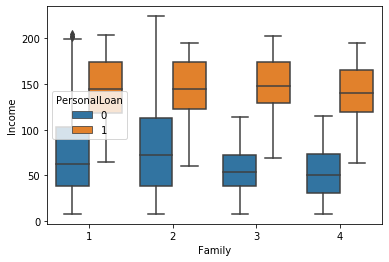

In [62]:
sns.boxplot(x='Family', y='Income', hue='PersonalLoan', data=dataframe )

Observation:<br>
    Families with income less than 100K are less likely to take loan,than families with high income.

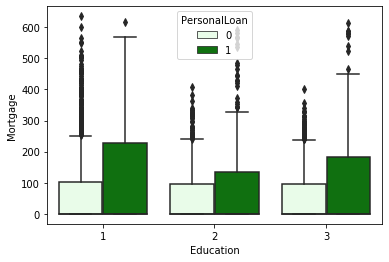

In [63]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=dataframe,color='green')

Inference : <br>
From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

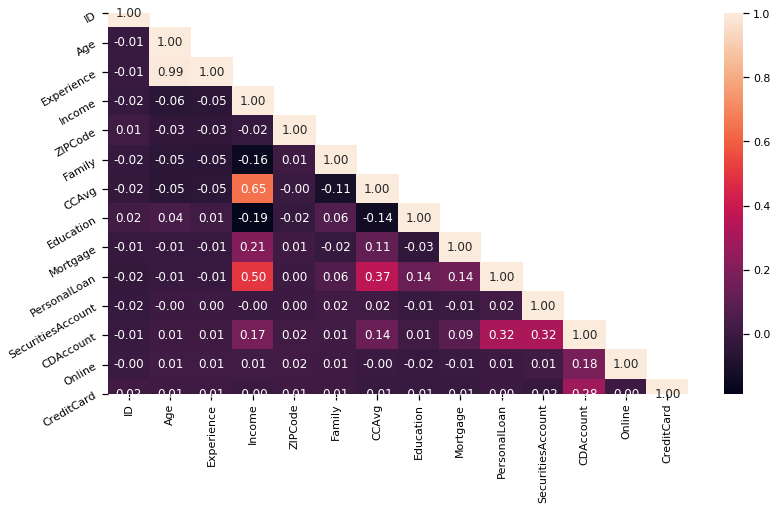

In [304]:
# Correlation with heat map

corr = dataframe.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Observation:<br>

Age and Experience is highly correlated.<br>
Income and CCAvg is moderately correlated.


In [42]:
#Check for missing data
dataframe.apply(lambda x : sum(x.isnull()))

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

Observation: <br>As per above output input data file does not have any missing data. Good to go ahead.

In [27]:
#Check howmany rows are having negative value in Experience column

dataframe[dataframe['Experience'] < 0 ]['Experience'].count()

52

In [64]:
positiveExp = dataframe.loc[dataframe['Experience'] >0]
negExp = dataframe.Experience < 0
# getting the customer ID who has negative experience
neglist = dataframe.loc[negExp]['ID'].tolist()


In [66]:
for id in neglist:
    age = dataframe.loc[np.where(dataframe['ID']==id)]["Age"].tolist()[0]
    education = dataframe.loc[np.where(dataframe['ID']==id)]["Education"].tolist()[0]
    positiveExp_filtered = positiveExp[(positiveExp.Age == age) & (positiveExp.Education == education)]
    exp = positiveExp_filtered['Experience'].median()
    dataframe.loc[dataframe.loc[np.where(dataframe['ID']==id)].index, 'Experience'] = exp

In [67]:
# checking if there are records with negative experience
dataframe[dataframe['Experience'] < 0]['Experience'].count()

0

Observation:<br>
After treatment, result shows Negative Experience data is zero.
This is good to go further.


In [68]:
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Obervation:<br>
After negative experience treatment, Transpose matrix shows that minimum experience is 0, previously it was showing -3 and mean also changed to 20.243211 from 20.104600. Rest of the values remain same.


In [111]:
dataframe['PersonalLoan'].value_counts()

0    4520
1     480
Name: PersonalLoan, dtype: int64

Observation: <br>
Among the 5000 customers 480 customers accepted the Personal loan (9.6%) <br>
Among the 5000 customers 4520 customers not accepted the Personal loan (90.4%)

## Preparing the data to train a model 

<font color=blue size=3> Create the training set and test set in ration of 70:30 </font>

In [78]:
from sklearn.model_selection import train_test_split

In [143]:
#X_train, X_test, y_train, y_test 
X = dataframe.drop(['ID','Experience','CCAvg','PersonalLoan'],axis=1) 
Y = dataframe['PersonalLoan']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

print(x_train.shape)
print(x_test.shape)

(3500, 10)
(1500, 10)


In [144]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(dataframe.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(dataframe.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [145]:
x_train.describe()

,Age,Income,ZIPCode,Family,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.435429,73.640000,93154.421429,2.395143,1.886286,56.054857,0.104571,0.062571,0.591143,0.297429
std,11.507821,46.168251,2259.694861,1.145654,0.839634,100.523942,0.306044,0.242225,0.491693,0.457192
min,23.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,91910.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,63.000000,93555.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,98.000000,94608.000000,3.000000,3.000000,100.250000,0.000000,0.000000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,3.000000,617.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
x_test.describe()

,Age,Income,ZIPCode,Family,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,45.112000,74.087333,93148.026667,2.399333,1.868667,57.534667,0.104000,0.055333,0.610000,0.28600
std,11.358879,45.732111,1759.387617,1.152715,0.840569,104.464156,0.305362,0.228706,0.487913,0.45204
min,23.000000,8.000000,90009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,35.000000,39.000000,92007.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,45.000000,64.000000,93305.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.00000
75%,55.000000,101.000000,94608.000000,3.000000,3.000000,102.000000,0.000000,0.000000,1.000000,1.00000
max,67.000000,202.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.00000


## Training and making predictions using a classification model 

Build Naive Bayes Classifier on training Dataset

In [147]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

In [299]:
# creatw the model
naive_model = GaussianNB()

naive_model.fit(x_train, y_train.ravel())

naive_train_predict = naive_model.predict(x_train)

naive_test_predict = naive_model.predict(x_test)

print("\nModel Accuracy on train data: {0:.4f}".format(metrics.accuracy_score(y_train, naive_train_predict)))
naive_score = metrics.accuracy_score(y_test, naive_test_predict)
print("\nModel Accuracy on test data: {0:.4f}".format(naive_score))



Model Accuracy on train data: 0.9066

Model Accuracy on test data: 0.8973


Confusion Matrix
   Predict 1  Predict 0
1         68         81
0         73       1278


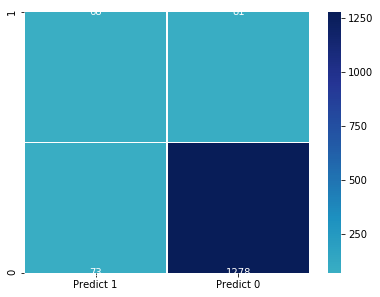

In [295]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, naive_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print(df_cm)
plt.figure(figsize = (6.4, 4.8),frameon=False)
sns.heatmap(df_cm, annot=True,fmt="d",center=0,linewidths=.2,cmap="YlGnBu")

In [185]:
print("Classification Report")
print(metrics.classification_report(y_test, naive_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.48      0.46      0.47       149
           0       0.94      0.95      0.94      1351

    accuracy                           0.90      1500
   macro avg       0.71      0.70      0.71      1500
weighted avg       0.89      0.90      0.90      1500



We can see our true positive numbers with value 1 is of precision and recall is below 70%

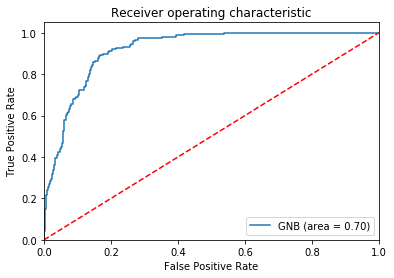

In [181]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


GNB_roc_auc = roc_auc_score(y_test, naive_model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, naive_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GNB (area = %0.2f)' % GNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

KNN algorithm

In [215]:
dataframe.groupby(["PersonalLoan"]).count()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
PersonalLoan,,,,,,,,,,,,,
0,4520,4520,4491,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [216]:
knnDataFrame = dataframe.drop(labels = "ID", axis = 1)

Drop the first column (ID) from the data frame. This is Id column which is not used in modeling

In [217]:
#Check the datatype of dataframe
knnDataFrame.dtypes

Age                    int64
Experience           float64
Income                 int64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
PersonalLoan           int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

In [308]:
knnDataFrame['PersonalLoan'] = knnDataFrame.PersonalLoan.astype('category')
#Check the datatype of dataframe after modification
knnDataFrame.dtypes

Age                     int64
Experience            float64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
PersonalLoan         category
SecuritiesAccount       int64
CDAccount               int64
Online                  int64
CreditCard              int64
dtype: object

In [309]:
# Create a separate dataframe consisting only of the features i.e independent attributes

X = knnDataFrame.drop(['Experience','PersonalLoan'] , axis = 1)
y = knnDataFrame["PersonalLoan"]
X.head()

,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,49,91107,4,1.6,1,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,1


In [310]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.
from scipy.stats import zscore

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,1.939449e-16,1.513445e-15,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-1.428969e+00,-3.951919e+01,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-9.019702e-01,-7.554825e-01,-5.851619e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,-2.952359e-02,-2.123482e-01,1.340930e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.429230e-01,5.263146e-01,6.860245e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.889859e+00,3.263712e+00,1.648959e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


In [311]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

In [312]:
from sklearn.neighbors import KNeighborsClassifier

KNN_Model = KNeighborsClassifier(n_neighbors=5 , weights = 'distance' )


In [313]:
# Call Nearest Neighbour algorithm

KNN_Model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

### Evaluate Performance of kNN Model

In [314]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = KNN_Model.predict(X_test)
print(predicted_labels) 
print("KNN Training score:", KNN_Model.score(X_train, y_train))
KNN_score = KNN_Model.score(X_test, y_test)
print("KNN Testing score: ", KNN_score)

[1 0 0 ... 0 0 0]
KNN Training score: 1.0
KNN Testing score:  0.9526666666666667


Confusion Matrix
   Predict 1  Predict 0
1         86         63
0          8       1343


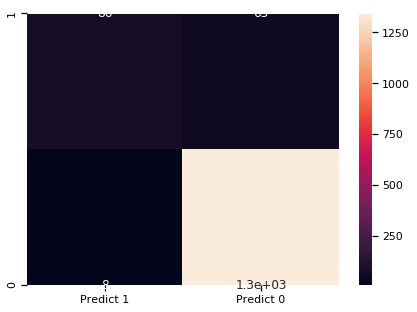

In [315]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1,0])


df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print(df_cm)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [316]:
print("Classification Report")
print(metrics.classification_report(y_test, predicted_labels, labels=[0, 1]))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.91      0.58      0.71       149

    accuracy                           0.95      1500
   macro avg       0.94      0.79      0.84      1500
weighted avg       0.95      0.95      0.95      1500



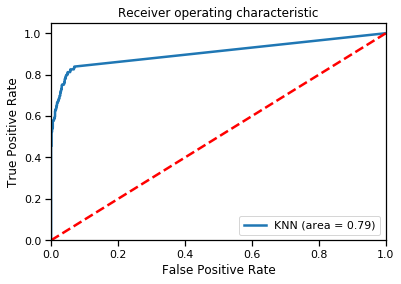

In [317]:
KNN_roc_auc = roc_auc_score(y_test, KNN_Model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, KNN_Model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression algorithm

In [318]:
X_train.head()

,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
1334,0.144966,-0.842384,0.542739,-0.345432,-0.365061,-1.049078,-0.555524,-0.341423,-0.25354,0.821951,-0.645314
4768,-0.640236,-0.755483,-0.016262,-1.216855,0.035515,0.141703,-0.555524,-0.341423,-0.25354,0.821951,-0.645314
65,1.191902,1.243252,-0.844867,-1.216855,1.065567,-1.049078,-0.555524,-0.341423,-0.25354,0.821951,1.549632
177,-1.425438,-0.190623,0.461670,1.397414,-0.078935,0.141703,1.843604,-0.341423,-0.25354,-1.216618,-0.645314
4489,-0.552992,-1.146539,1.114938,0.525991,-0.994537,0.141703,-0.555524,-0.341423,-0.25354,0.821951,-0.645314


In [319]:
X_train.shape

(3500, 11)

In [320]:
y_train.head()

1334    0
4768    0
65      0
177     0
4489    0
Name: PersonalLoan, dtype: category
Categories (2, int64): [0, 1]

In [321]:
# Trianing data : X_train, X_test Testing data: y_train, y_test

In [322]:
from sklearn.linear_model import LogisticRegression

# Fit the model on train
LR_model = LogisticRegression(solver="liblinear")
LR_model.fit(X_train, y_train)
#predict on test

LR_predict = LR_model.predict(X_test)

coef_df = pd.DataFrame(LR_model.coef_)
coef_df['intercept'] = LR_model.intercept_
print(coef_df)

          0         1         2         3        4         5        6  \
0  0.051464  2.313345  0.018107  0.779962  0.29431  1.345803  0.07746   

          7         8         9       10  intercept  
0 -0.341037  0.871571 -0.285637 -0.49864  -4.569541  


In [323]:
LR_model_score = LR_model.score(X_test, y_test)
print(LR_model_score)

0.9486666666666667


   Predict 1  Predict 0
1         87         62
0         15       1336


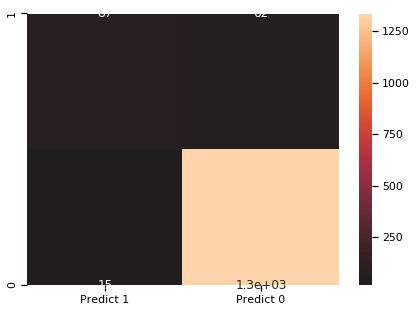

In [324]:
cm=metrics.confusion_matrix(y_test, LR_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print(df_cm)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, center=1)

In [325]:
print("Classification Report")
print(metrics.classification_report(y_test, predicted_labels, labels=[0, 1]))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.91      0.58      0.71       149

    accuracy                           0.95      1500
   macro avg       0.94      0.79      0.84      1500
weighted avg       0.95      0.95      0.95      1500



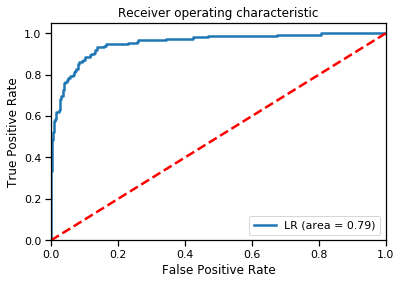

In [326]:
KNN_roc_auc = roc_auc_score(y_test, LR_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LR_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LR (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Model comparison

confusion matrix for all the above models

In [327]:
models = pd.DataFrame({
    'Model': ['K - Nearest Neighbors', 'Logistic Regression','Naive Bayes'],
    'Score': [KNN_score, LR_model_score, naive_score, 
              ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,K - Nearest Neighbors,0.952667
1,Logistic Regression,0.948667
2,Naive Bayes,0.897333


KNN or Logistic Regression model are appropriate models because both the model score is approximal 95% and ROC under the cure area also same as 0.79 <br>
If we look at classification matirix of both model the precision and recall value same <br>
both personal loan accepted customer and who did not accept the personal loan (as per target variable).<br>

So we can conclude as per above confusion matrix KNN model is more suitable model (95.3%) for this project.
